In [16]:
import kagglehub
from nltk import book

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

e:\Semantic-Book-Recommender\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.


LookupError: 
**********************************************************************
  Resource [93mgutenberg[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('gutenberg')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/gutenberg[0m

  Searched in:
    - 'C:\\Users\\Arnob/nltk_data'
    - 'e:\\Semantic-Book-Recommender\\.venv\\nltk_data'
    - 'e:\\Semantic-Book-Recommender\\.venv\\share\\nltk_data'
    - 'e:\\Semantic-Book-Recommender\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\Arnob\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
import pandas as pd

In [ ]:
books = pd.read_csv(f"data/books.csv")
#or book = pd.read_csv(f"{path}/books.csv")

In [ ]:
books


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


seaborn heatmap for data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

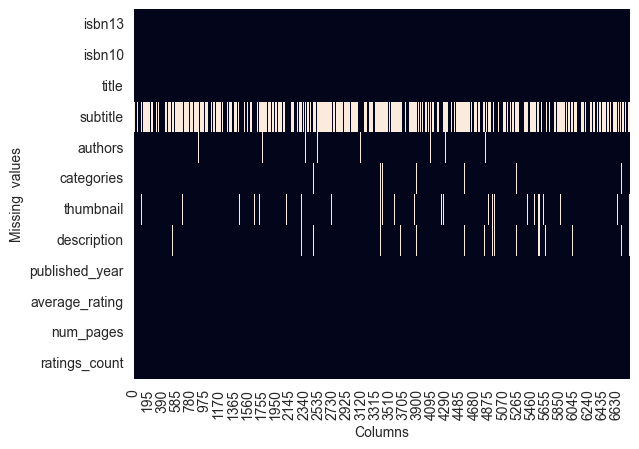

In [ ]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(),cbar=False,ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing  values")

plt.show()

In [ ]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(),1,0)
books["age_of_book"] = 2024 - books["published_year"]

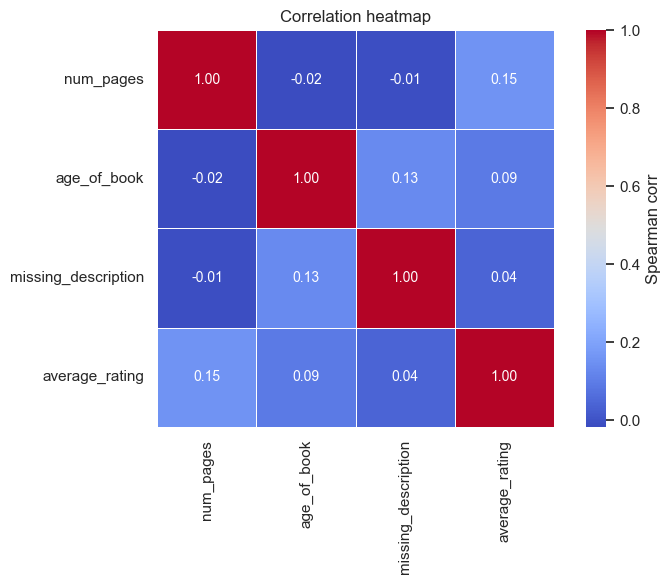

In [ ]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ensure 'age_of_book' is up-to-date
books["age_of_book"] = datetime.datetime.now().year - books["published_year"]

columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Spearman corr"},   # <-- fixed here
    square=True,
    linewidths=0.5,
    annot_kws={"fontsize": 10}
)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

In [ ]:
# select rows where any of the listed columns is missing
book_missing =books[
    ~books[["description", "num_pages", "average_rating", "published_year"]]
    .isna()
    .any(axis=1)
]

In [ ]:
book_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Courage,1
527,Otherland (Imaginary place),1
528,Animals,1
529,Children of divorced parents,1


In [ ]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()
book_missing

C:\Users\Arnob\AppData\Local\Temp\ipykernel_15796\1898747564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245


In [73]:
book_missing.loc[book_missing["words_in_description"].between(1,4),"description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [74]:
book_missing.loc[book_missing["words_in_description"].between(25,34),"description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

only keeping description that more then 25 words

In [75]:
book_missing_25_words = book_missing[book_missing["words_in_description"]>=25]

In [76]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [77]:
book_missing_25_words["title_and_subtitle"] = np.where(
    book_missing_25_words["subtitle"].isna(),
    book_missing_25_words["title"],
    book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1)
)


C:\Users\Arnob\AppData\Local\Temp\ipykernel_15796\3183648412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = np.where(


In [78]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [79]:
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join, axis=1)

C:\Users\Arnob\AppData\Local\Temp\ipykernel_15796\3523980526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join, axis=1)


In [80]:
(
    book_missing_25_words.drop(["subtitle","missing_description","age_of_book","words_in_description"],axis=1)
    .to_csv("books_cleaned.csv",index=False)
)

End of data set cleaning

In [125]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma


In [127]:
from dotenv import load_dotenv

load_dotenv()


True

In [82]:
import pandas as pd

books = pd.read_csv("books_cleaned.csv")

In [83]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [84]:
books["tagged_description"]

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
2       9780006178736 A memorable, mesmerizing heroine...
3       9780006280897 Lewis' work on the nature of lov...
4       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
5192    9788172235222 On A Train Journey Home To North...
5193    9788173031014 This book tells the tale of a ma...
5194    9788179921623 Wisdom to Create a Life of Passi...
5195    9788185300535 This collection of the timeless ...
5196    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [101]:
books["tagged_description"].to_csv("tagged_description.txt",
                                   sep = "\n",
                                   index = False,
                                   header = False)


In [115]:

raw_documents = TextLoader(
    "tagged_description.txt",
    encoding="utf-8"
).load()

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1,   # practically unlimited
    chunk_overlap=0
)

documents = text_splitter.split_documents(raw_documents)


Created a chunk of size 1168, which is longer than the specified 1
Created a chunk of size 1214, which is longer than the specified 1
Created a chunk of size 373, which is longer than the specified 1
Created a chunk of size 309, which is longer than the specified 1
Created a chunk of size 483, which is longer than the specified 1
Created a chunk of size 482, which is longer than the specified 1
Created a chunk of size 960, which is longer than the specified 1
Created a chunk of size 188, which is longer than the specified 1
Created a chunk of size 843, which is longer than the specified 1
Created a chunk of size 296, which is longer than the specified 1
Created a chunk of size 197, which is longer than the specified 1
Created a chunk of size 881, which is longer than the specified 1
Created a chunk of size 1088, which is longer than the specified 1
Created a chunk of size 1189, which is longer than the specified 1
Created a chunk of size 304, which is longer than the specified 1
Create

In [119]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [131]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma

embedding = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

db_books = Chroma.from_documents(
    documents,
    embedding=embedding
)


In [133]:
query = "A book to teach children about nature"
docs = db_books.similarity_search(query, k = 10)
docs

[Document(metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from sim

In [134]:
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [140]:
def retrieve_semantic_recommendations(
        query: str,
        top_k: int = 10,
) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k = 50)

    books_list = []

    for i in range(0, len(recs)):
        books_list += [int(recs[i].page_content.strip('"').split()[0])]

    return books[books["isbn13"].isin(books_list)]

In [149]:
retrieve_semantic_recommendations("A books about war")


,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
66,9780007162994,0007162995,If I Die in a Combat Zone,Tim O'Brien,"Vietnam War, 1961-1975",http://books.google.com/books/content?id=0qUtS...,Perhaps the best book to emerge from the Vietn...,2003.0,3.95,208.0,11.0,If I Die in a Combat Zone,9780007162994 Perhaps the best book to emerge ...
461,9780099273868,0099273861,The Great World,David Malouf,Australia,http://books.google.com/books/content?id=f8IiK...,"""Every city, town and village has its memorial...",1999.0,3.87,336.0,514.0,The Great World,"9780099273868 ""Every city, town and village ha..."
524,9780099483472,0099483475,All Quiet on the Western Front,Erich Maria Remarque,"World War, 1914-1918",NaN,All Quiet on the Western Front is probably the...,2005.0,3.95,216.0,1018.0,All Quiet on the Western Front,9780099483472 All Quiet on the Western Front i...
572,9780140149241,0140149244,We Were the Rats,Lawson Glassop,"Tobruk, Battles of, 1941-1942",NaN,Reissue of the famous novel based on the autho...,1991.0,3.23,275.0,13.0,We Were the Rats,9780140149241 Reissue of the famous novel base...
955,9780192822895,0192822896,La Débâcle,Emile Zola;Elinor Dorday;Robert Lethbridge,Fiction,http://books.google.com/books/content?id=GxNnS...,Zola wrote that 'my title speaks not merely of...,2000.0,3.99,592.0,763.0,La Débâcle,9780192822895 Zola wrote that 'my title speaks...
1006,9780195168952,019516895X,Battle Cry of Freedom,James M. McPherson,History,http://books.google.com/books/content?id=09FkZ...,Filled with fresh interpretations and informat...,2005.0,4.34,867.0,22318.0,Battle Cry of Freedom: The Civil War Era,9780195168952 Filled with fresh interpretation...
1105,9780275942694,0275942694,The Heights of Courage,Avigdor Kahalani,History,http://books.google.com/books/content?id=7aIXJ...,"In October 1973, the State of Israel was invad...",1992.0,4.18,234.0,97.0,The Heights of Courage: A Tank Leader's War on...,"9780275942694 In October 1973, the State of Is..."
1199,9780312265052,0312265050,The Naked and the Dead,Norman Mailer,Fiction,http://books.google.com/books/content?id=c66GL...,Portrays the contrasting personalities and nos...,2000.0,3.94,721.0,20541.0,The Naked and the Dead: 50th Anniversary Editi...,9780312265052 Portrays the contrasting persona...
1735,9780375760525,0375760520,Paris 1919,Margaret MacMillan,History,http://books.google.com/books/content?id=5NYdw...,National Bestseller New York Times Editors’ Ch...,2002.0,4.07,570.0,9150.0,Paris 1919: Six Months That Changed the World,9780375760525 National Bestseller New York Tim...
2370,9780451207791,0451207793,The Key to Rebecca,Ken Follett,Fiction,http://books.google.com/books/content?id=BGxfA...,"While Rommel's army bears down on Cairo, a rut...",2003.0,3.88,352.0,18661.0,The Key to Rebecca,9780451207791 While Rommel's army bears down o...
